# Plotting feature importances

In [92]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
# load data from csv file

# read csv file
dt = pd.read_csv("DT_feature_importance.csv")
lr = pd.read_csv("LR_feature_importance.csv")
rf = pd.read_csv("RF_feature_importance.csv")
xgb = pd.read_csv("XGB_feature_importance.csv")



In [94]:
# change column names of dt to "variable" and "DT"

dt.columns = ["Variable", "DT"]
dt.head()

,Variable,DT
0,income,0.145870
1,name_email_similarity,0.030998
2,prev_address_months_count,0.045472
3,current_address_months_count,0.025354
4,customer_age,0.010699


In [95]:
# rename columns
lr.columns = ['Variable', 'LR']
lr.head()


,Variable,LR
0,income,0.029740
1,name_email_similarity,0.034713
2,prev_address_months_count,0.027528
3,current_address_months_count,0.006235
4,customer_age,0.056480


In [96]:
# drop first column of rf

rf = rf.drop(rf.columns[0], axis=1)

# rename columns
rf.columns = ['Variable', 'RF']
rf.head()

,Variable,RF
0,income,0.050207
1,name_email_similarity,0.049090
2,prev_address_months_count,0.045291
3,current_address_months_count,0.074836
4,customer_age,0.039435


In [97]:
xgb = xgb.drop(xgb.columns[0], axis=1)

# rename columns
xgb.columns = ['Variable', 'XGB']
xgb.head()


,Variable,XGB
0,income,0.047599
1,name_email_similarity,0.029424
2,prev_address_months_count,0.039777
3,current_address_months_count,0.041840
4,customer_age,0.048013


In [98]:
# merge dataframes by column "Variable"
df = pd.merge(lr, dt, on="Variable")
#df = pd.merge(df, rf, on="Variable")
#df = pd.merge(df, xgb, on="Variable")
df.head()


,Variable,LR,DT
0,income,0.029740,0.145870
1,name_email_similarity,0.034713,0.030998
2,prev_address_months_count,0.027528,0.045472
3,current_address_months_count,0.006235,0.025354
4,customer_age,0.056480,0.010699


In [99]:
df = pd.merge(df, rf, on="Variable")

In [100]:
df.head()

,Variable,LR,DT,RF
0,income,0.029740,0.145870,0.050207
1,name_email_similarity,0.034713,0.030998,0.049090
2,prev_address_months_count,0.027528,0.045472,0.045291
3,current_address_months_count,0.006235,0.025354,0.074836
4,customer_age,0.056480,0.010699,0.039435


In [101]:
df = pd.merge(df, xgb, on="Variable")

In [102]:
df.head()

,Variable,LR,DT,RF,XGB
0,income,0.029740,0.145870,0.050207,0.047599
1,name_email_similarity,0.034713,0.030998,0.049090,0.029424
2,prev_address_months_count,0.027528,0.045472,0.045291,0.039777
3,current_address_months_count,0.006235,0.025354,0.074836,0.041840
4,customer_age,0.056480,0.010699,0.039435,0.048013


In [103]:
ranking = df.copy()

# round values to 4 decimals
ranking = ranking.round(3)

# new column rank_LR with ranking of LR (with 1 being the highest value, no decimals)
ranking['rank_LR'] = ranking['LR'].rank(ascending=False).astype(int)
ranking['rank_DT'] = ranking['DT'].rank(ascending=False).astype(int)
ranking['rank_RF'] = ranking['RF'].rank(ascending=False).astype(int)
ranking['rank_XGB'] = ranking['XGB'].rank(ascending=False).astype(int)
ranking['Average_rank'] = ranking[['rank_LR', 'rank_DT', 'rank_RF', 'rank_XGB']].mean(axis=1)

ranking.sort_values(by=['Average_rank'], inplace=True)
ranking.head()

,Variable,LR,DT,RF,XGB,rank_LR,rank_DT,rank_RF,rank_XGB,Average_rank
26,os_windows,0.037,0.065,0.148,0.084,5,6,1,1,3.25
13,credit_risk_score,0.040,0.093,0.078,0.047,4,3,2,7,4.00
0,income,0.030,0.146,0.050,0.048,11,1,5,5,5.50
4,customer_age,0.056,0.011,0.039,0.048,1,19,11,5,9.00
1,name_email_similarity,0.035,0.031,0.049,0.029,6,11,6,17,10.00


In [104]:
# convert ranking into latex table
print(ranking.to_latex(index=False))

\begin{tabular}{lrrrrrrrrr}
\toprule
                            Variable &    LR &    DT &    RF &   XGB &  rank\_LR &  rank\_DT &  rank\_RF &  rank\_XGB &  Average\_rank \\
\midrule
                          os\_windows & 0.037 & 0.065 & 0.148 & 0.084 &        5 &        6 &        1 &         1 &          3.25 \\
                   credit\_risk\_score & 0.040 & 0.093 & 0.078 & 0.047 &        4 &        3 &        2 &         7 &          4.00 \\
                              income & 0.030 & 0.146 & 0.050 & 0.048 &       11 &        1 &        5 &         5 &          5.50 \\
                        customer\_age & 0.056 & 0.011 & 0.039 & 0.048 &        1 &       19 &       11 &         5 &          9.00 \\
               name\_email\_similarity & 0.035 & 0.031 & 0.049 & 0.029 &        6 &       11 &        6 &        17 &         10.00 \\
                  keep\_alive\_session & 0.019 & 0.038 & 0.049 & 0.062 &       23 &       10 &        6 &         3 &         10.50 \\
   prev\_a

In [105]:
# create a new column "Average" and calculate the average of the four columns
df['Average'] = df.loc[:,[c for c in df.columns if c!= "Variable"]].mean(axis=1)
df.head()


,Variable,LR,DT,RF,XGB,Average
0,income,0.029740,0.145870,0.050207,0.047599,0.068354
1,name_email_similarity,0.034713,0.030998,0.049090,0.029424,0.036056
2,prev_address_months_count,0.027528,0.045472,0.045291,0.039777,0.039517
3,current_address_months_count,0.006235,0.025354,0.074836,0.041840,0.037066
4,customer_age,0.056480,0.010699,0.039435,0.048013,0.038657


In [106]:
# sort values by "Average" column

df = df.sort_values(by=['Average'], ascending=False)
df.head()


,Variable,LR,DT,RF,XGB,Average
26,os_windows,0.036909,0.065245,0.147571,0.083914,0.083410
0,income,0.029740,0.145870,0.050207,0.047599,0.068354
13,credit_risk_score,0.040221,0.092645,0.078354,0.047401,0.064655
19,proposed_credit_limit,0.012587,0.084308,0.062191,0.051850,0.052734
23,device_distinct_emails_8w,0.026696,0.105672,0.021873,0.033075,0.046829


In [107]:
# keep only the top 20 variables
df = df.head(20)
df.head()

,Variable,LR,DT,RF,XGB,Average
26,os_windows,0.036909,0.065245,0.147571,0.083914,0.083410
0,income,0.029740,0.145870,0.050207,0.047599,0.068354
13,credit_risk_score,0.040221,0.092645,0.078354,0.047401,0.064655
19,proposed_credit_limit,0.012587,0.084308,0.062191,0.051850,0.052734
23,device_distinct_emails_8w,0.026696,0.105672,0.021873,0.033075,0.046829


In [108]:
# sort values by "Average" column

df = df.sort_values(by=['Average'], ascending=True)
df.head()

,Variable,LR,DT,RF,XGB,Average
6,intended_balcon_amount,0.004009,0.028400,0.020236,0.015868,0.017128
25,os_other,0.006943,0.049421,0.014333,0.000000,0.017674
11,bank_branch_count_8w,0.005043,0.017043,0.023601,0.028872,0.018640
38,house_stat_BB,0.033290,0.007223,0.018330,0.032306,0.022787
29,pay_type_AC,0.004842,0.001655,0.011171,0.080611,0.024570


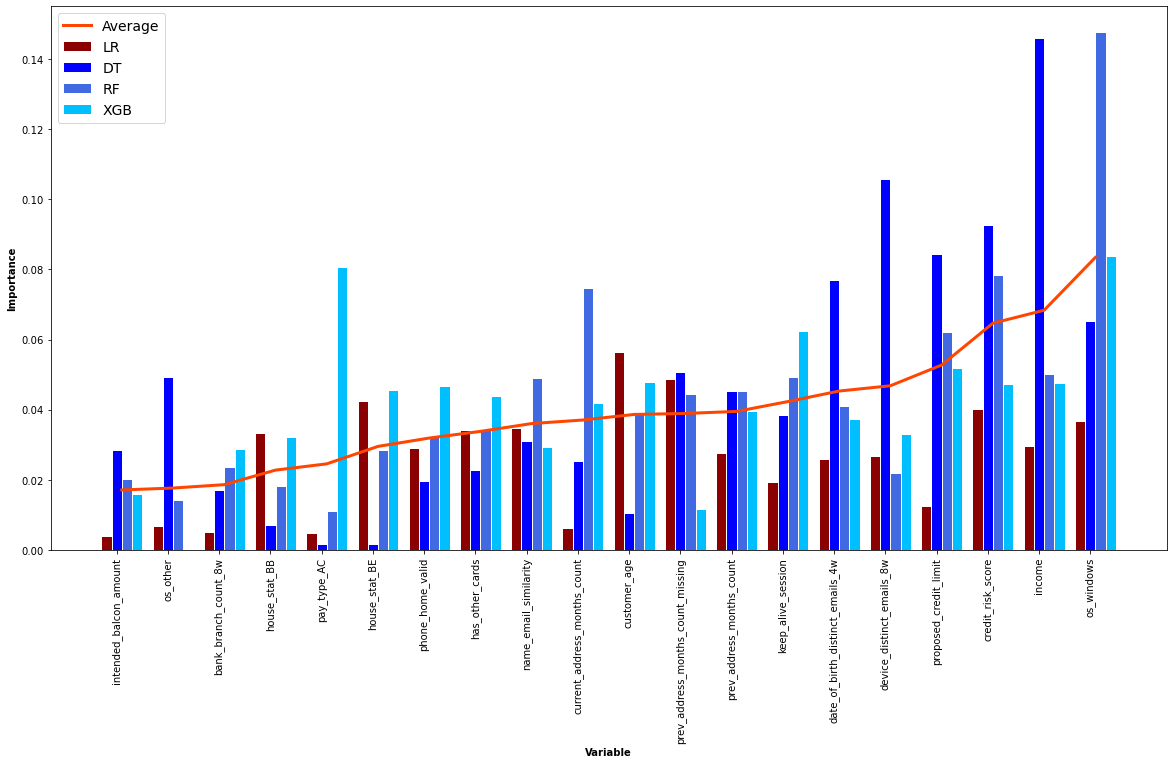

In [109]:
# plot df as bar chart with "variable" as y-axis and LR, DT, RF, XGB as x-axis. Plot "average" as a line    
# set width of bar
barWidth = 0.2

# set height of bar
bars1 = df['LR']
bars2 = df['DT']
bars3 = df['RF']
bars4 = df['XGB']
bars5 = df['Average']

# set position of bar on x-axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth/2 for x in r2]

# make the plot
plt.figure(figsize=(20,10))
plt.bar(r1, bars1, color="darkred", width=barWidth, edgecolor='white', label='LR')
plt.bar(r2, bars2, color="blue", width=barWidth, edgecolor='white', label='DT')
plt.bar(r3, bars3, color="royalblue", width=barWidth, edgecolor='white', label='RF')
plt.bar(r4, bars4, color="deepskyblue", width=barWidth, edgecolor='white', label='XGB')
plt.plot(r5, bars5, color='orangered', linewidth=3, label='Average')



# add xticks on the middle of the group bars
plt.xlabel('Variable', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df['Variable'], rotation=90)
plt.legend(fontsize="14")
plt.show()



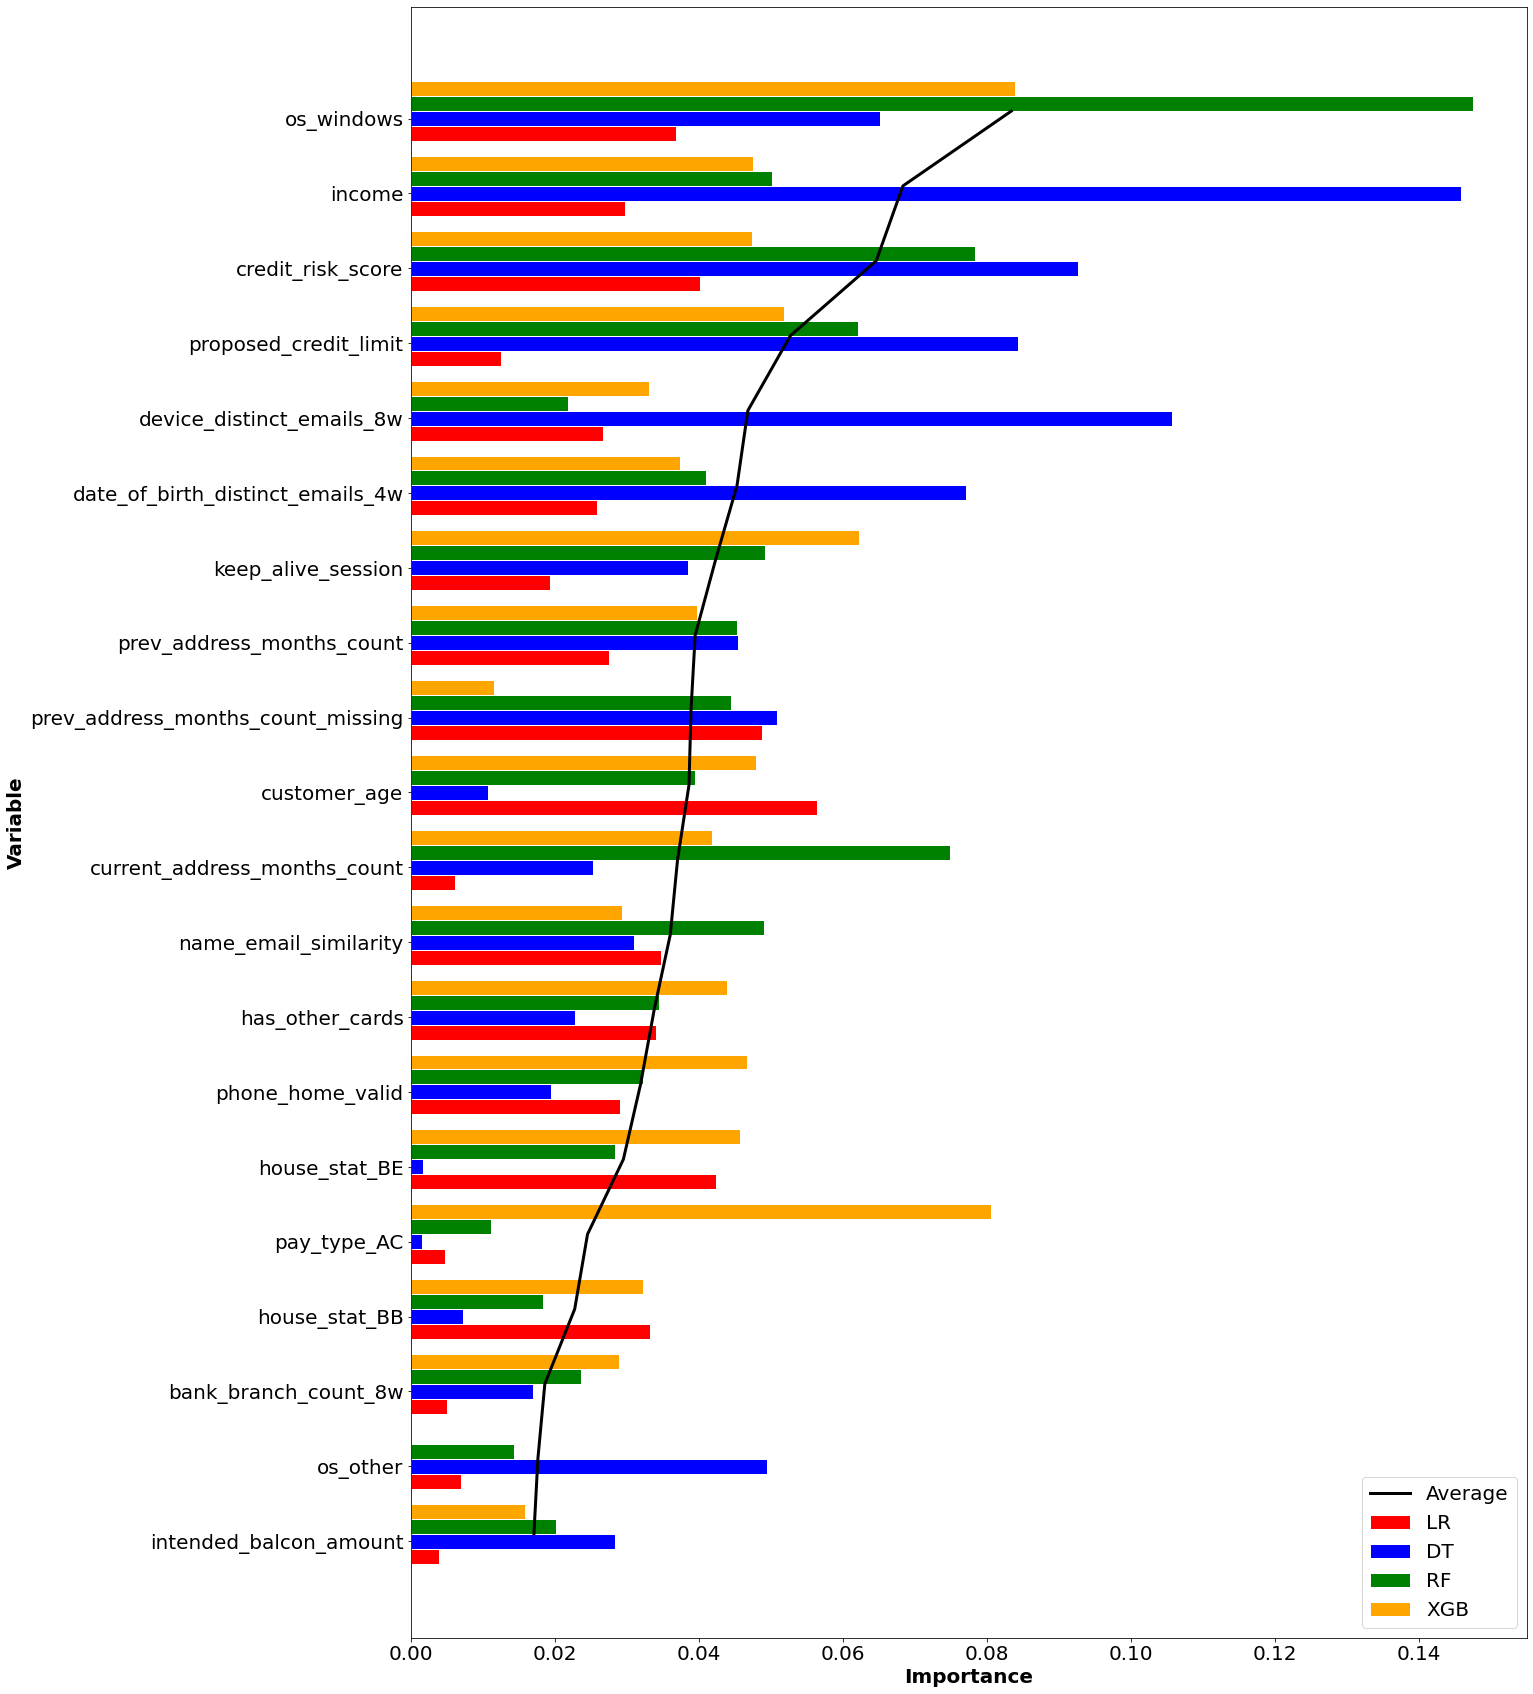

In [110]:
# make the same plot but with horizontal bars i.e. with feature names on y-axis and importance on x-axis

# set width of bar
barWidth = 0.2

# set height of bar
bars1 = df['LR']
bars2 = df['DT']
bars3 = df['RF']
bars4 = df['XGB']
bars5 = df['Average']

# set position of bar on x-axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth/2 for x in r2]

# make the plot
plt.figure(figsize=(20,30))
plt.barh(r1, bars1, color='red', height=barWidth, edgecolor='white', label='LR')
plt.barh(r2, bars2, color='blue', height=barWidth, edgecolor='white', label='DT')
plt.barh(r3, bars3, color='green', height=barWidth, edgecolor='white', label='RF')
plt.barh(r4, bars4, color='orange', height=barWidth, edgecolor='white', label='XGB')
plt.plot(bars5, r5, color='black', linewidth=3, label='Average')

# add xticks on the middle of the group bars
plt.ylabel('Variable', fontweight='bold', fontsize=20)
plt.xlabel('Importance', fontweight='bold', fontsize=20)
plt.yticks([r + barWidth for r in range(len(bars1))], df['Variable'], fontsize=20)
plt.xticks(fontsize=20)

# add legend on the right bottom
plt.legend(loc='lower right', fontsize=20)
plt.show()


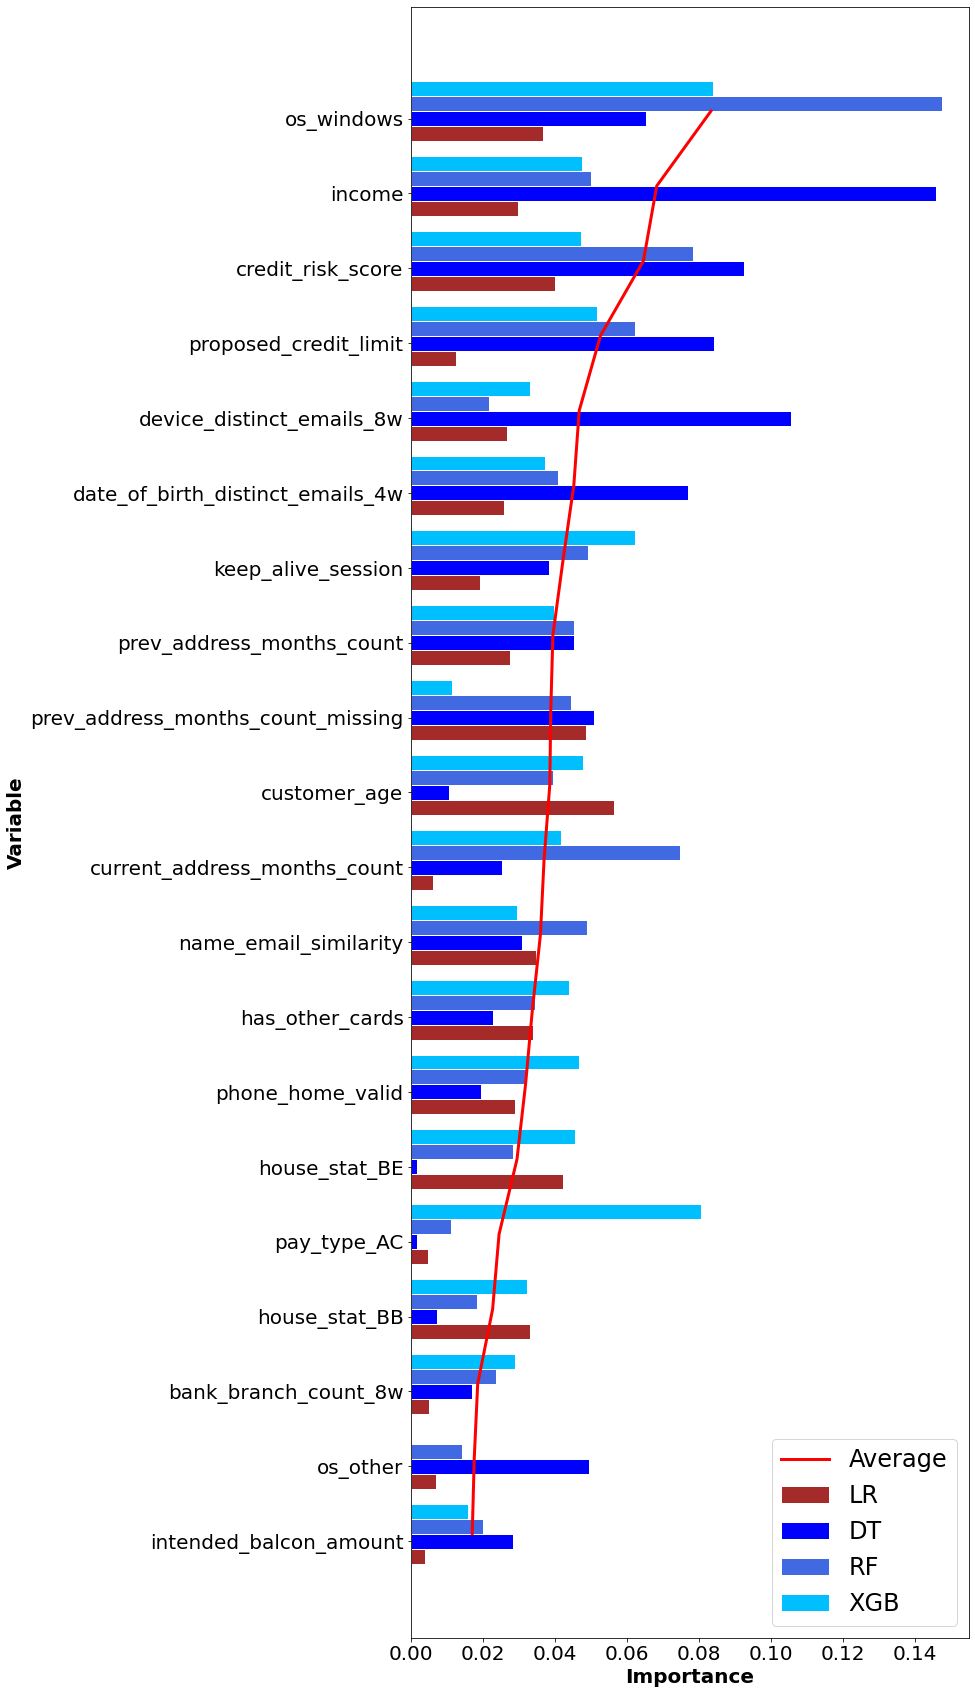

In [111]:
# plot the same graph but in color palette "tab20c"

# set width of bar
barWidth = 0.2

# set height of bar
bars1 = df['LR']
bars2 = df['DT']
bars3 = df['RF']
bars4 = df['XGB']
bars5 = df['Average']

# set position of bar on x-axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth/2 for x in r2]

# make the plot
plt.figure(figsize=(10,30))
plt.barh(r1, bars1, color='brown', height=barWidth, edgecolor='white', label='LR')
plt.barh(r2, bars2, color='blue', height=barWidth, edgecolor='white', label='DT')
plt.barh(r3, bars3, color='royalblue', height=barWidth, edgecolor='white', label='RF')
plt.barh(r4, bars4, color='deepskyblue', height=barWidth, edgecolor='white', label='XGB')
plt.plot(bars5, r5, color='red', linewidth=3, label='Average')

# add xticks on the middle of the group bars
plt.ylabel('Variable', fontweight='bold', fontsize=20)
plt.xlabel('Importance', fontweight='bold', fontsize=20)
plt.yticks([r + barWidth for r in range(len(bars1))], df['Variable'], fontsize=20)
plt.xticks(fontsize=20)

# add legend on the right bottom
plt.legend(loc='lower right', fontsize=24)
plt.show()


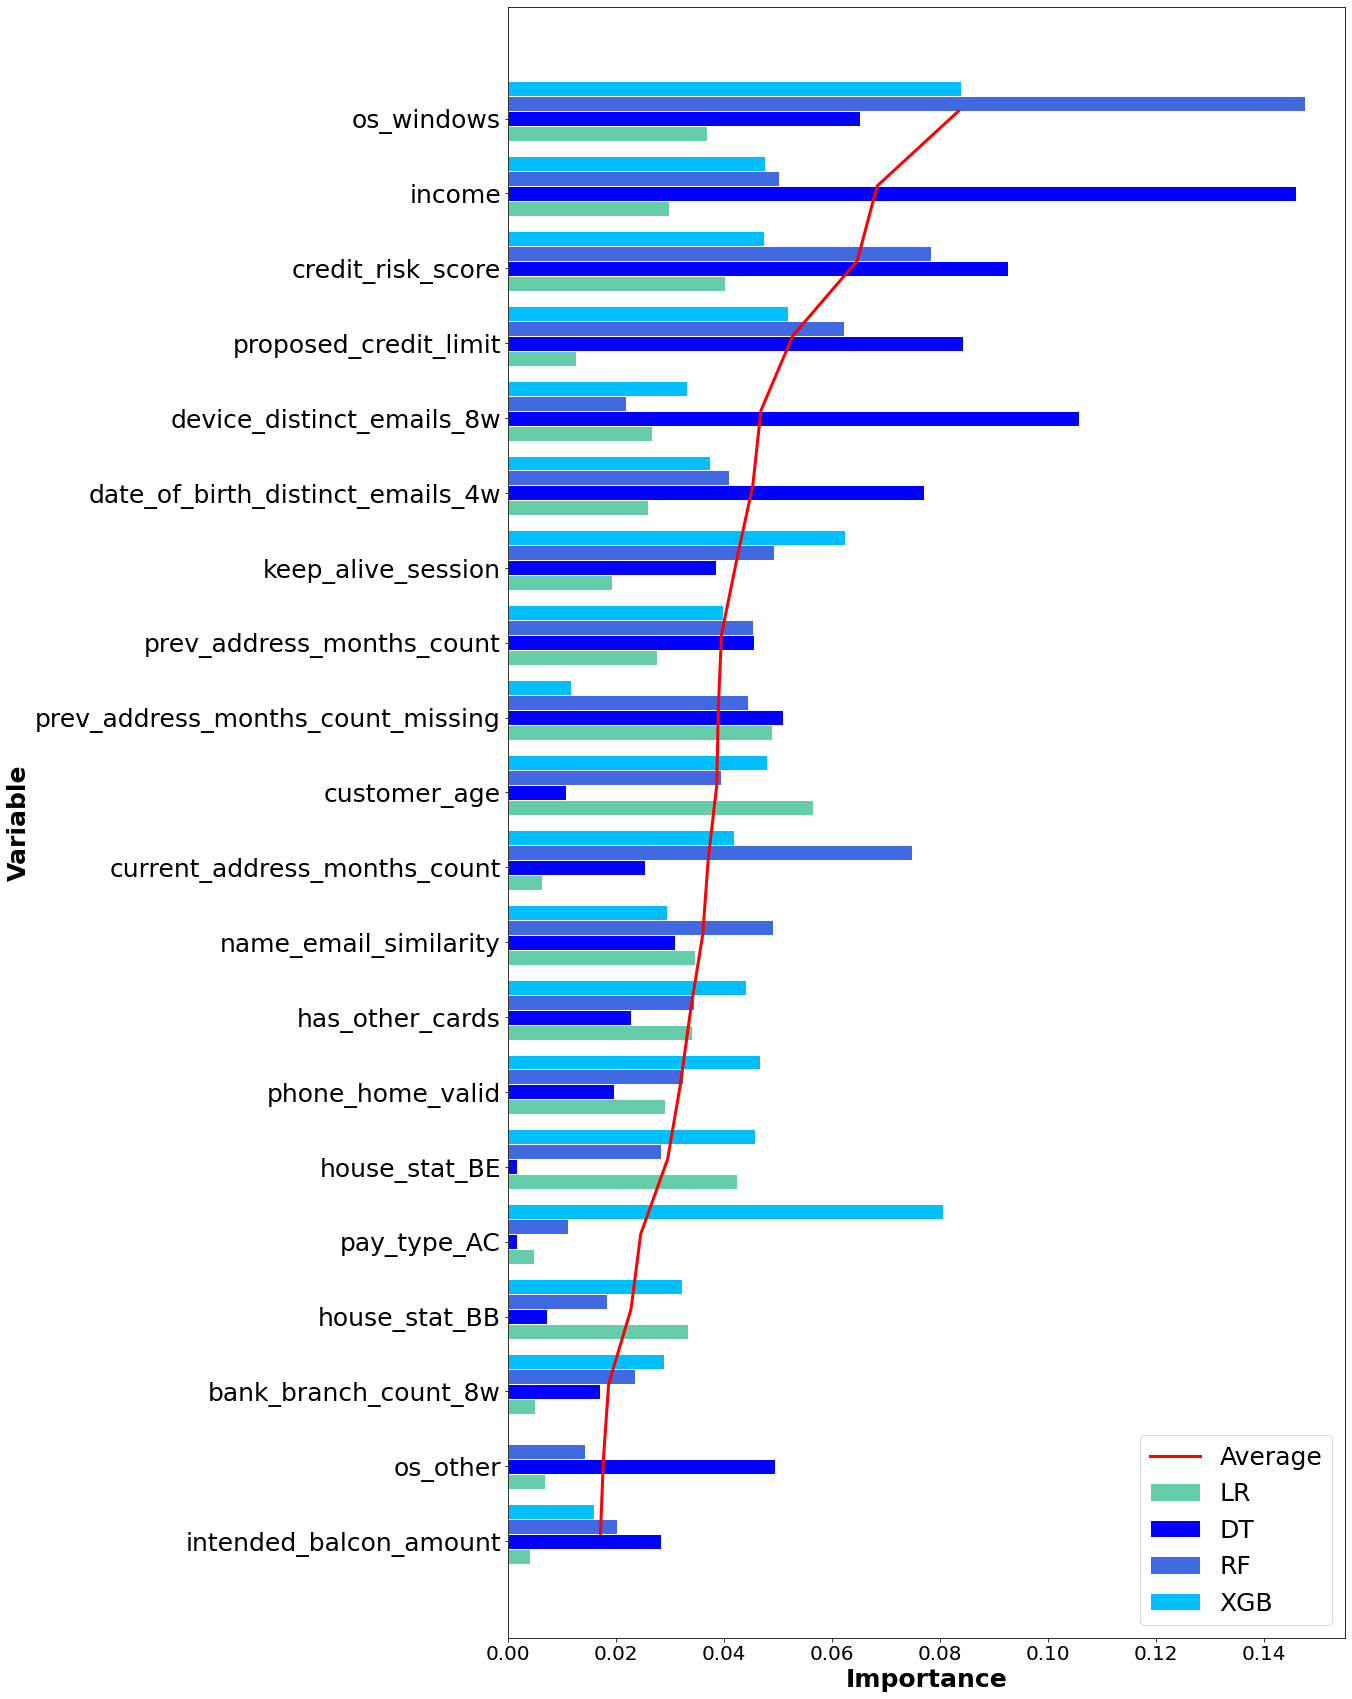

In [112]:
# set width of bar
barWidth = 0.2

# set height of bar
bars1 = df['LR']
bars2 = df['DT']
bars3 = df['RF']
bars4 = df['XGB']
bars5 = df['Average']

# set position of bar on x-axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth/2 for x in r2]

# make the plot
plt.figure(figsize=(15,30))
plt.barh(r1, bars1, color='mediumaquamarine', height=barWidth, edgecolor='white', label='LR')
plt.barh(r2, bars2, color='blue', height=barWidth, edgecolor='white', label='DT')
plt.barh(r3, bars3, color='royalblue', height=barWidth, edgecolor='white', label='RF')
plt.barh(r4, bars4, color='deepskyblue', height=barWidth, edgecolor='white', label='XGB')
plt.plot(bars5, r5, color='red', linewidth=3, label='Average')

# add xticks on the middle of the group bars
plt.ylabel('Variable', fontweight='bold', fontsize=25)
plt.xlabel('Importance', fontweight='bold', fontsize=25)
plt.yticks([r + barWidth for r in range(len(bars1))], df['Variable'], fontsize=25)
plt.xticks(fontsize=20)

# add legend on the right bottom
plt.legend(loc='lower right', fontsize=25)
plt.show()


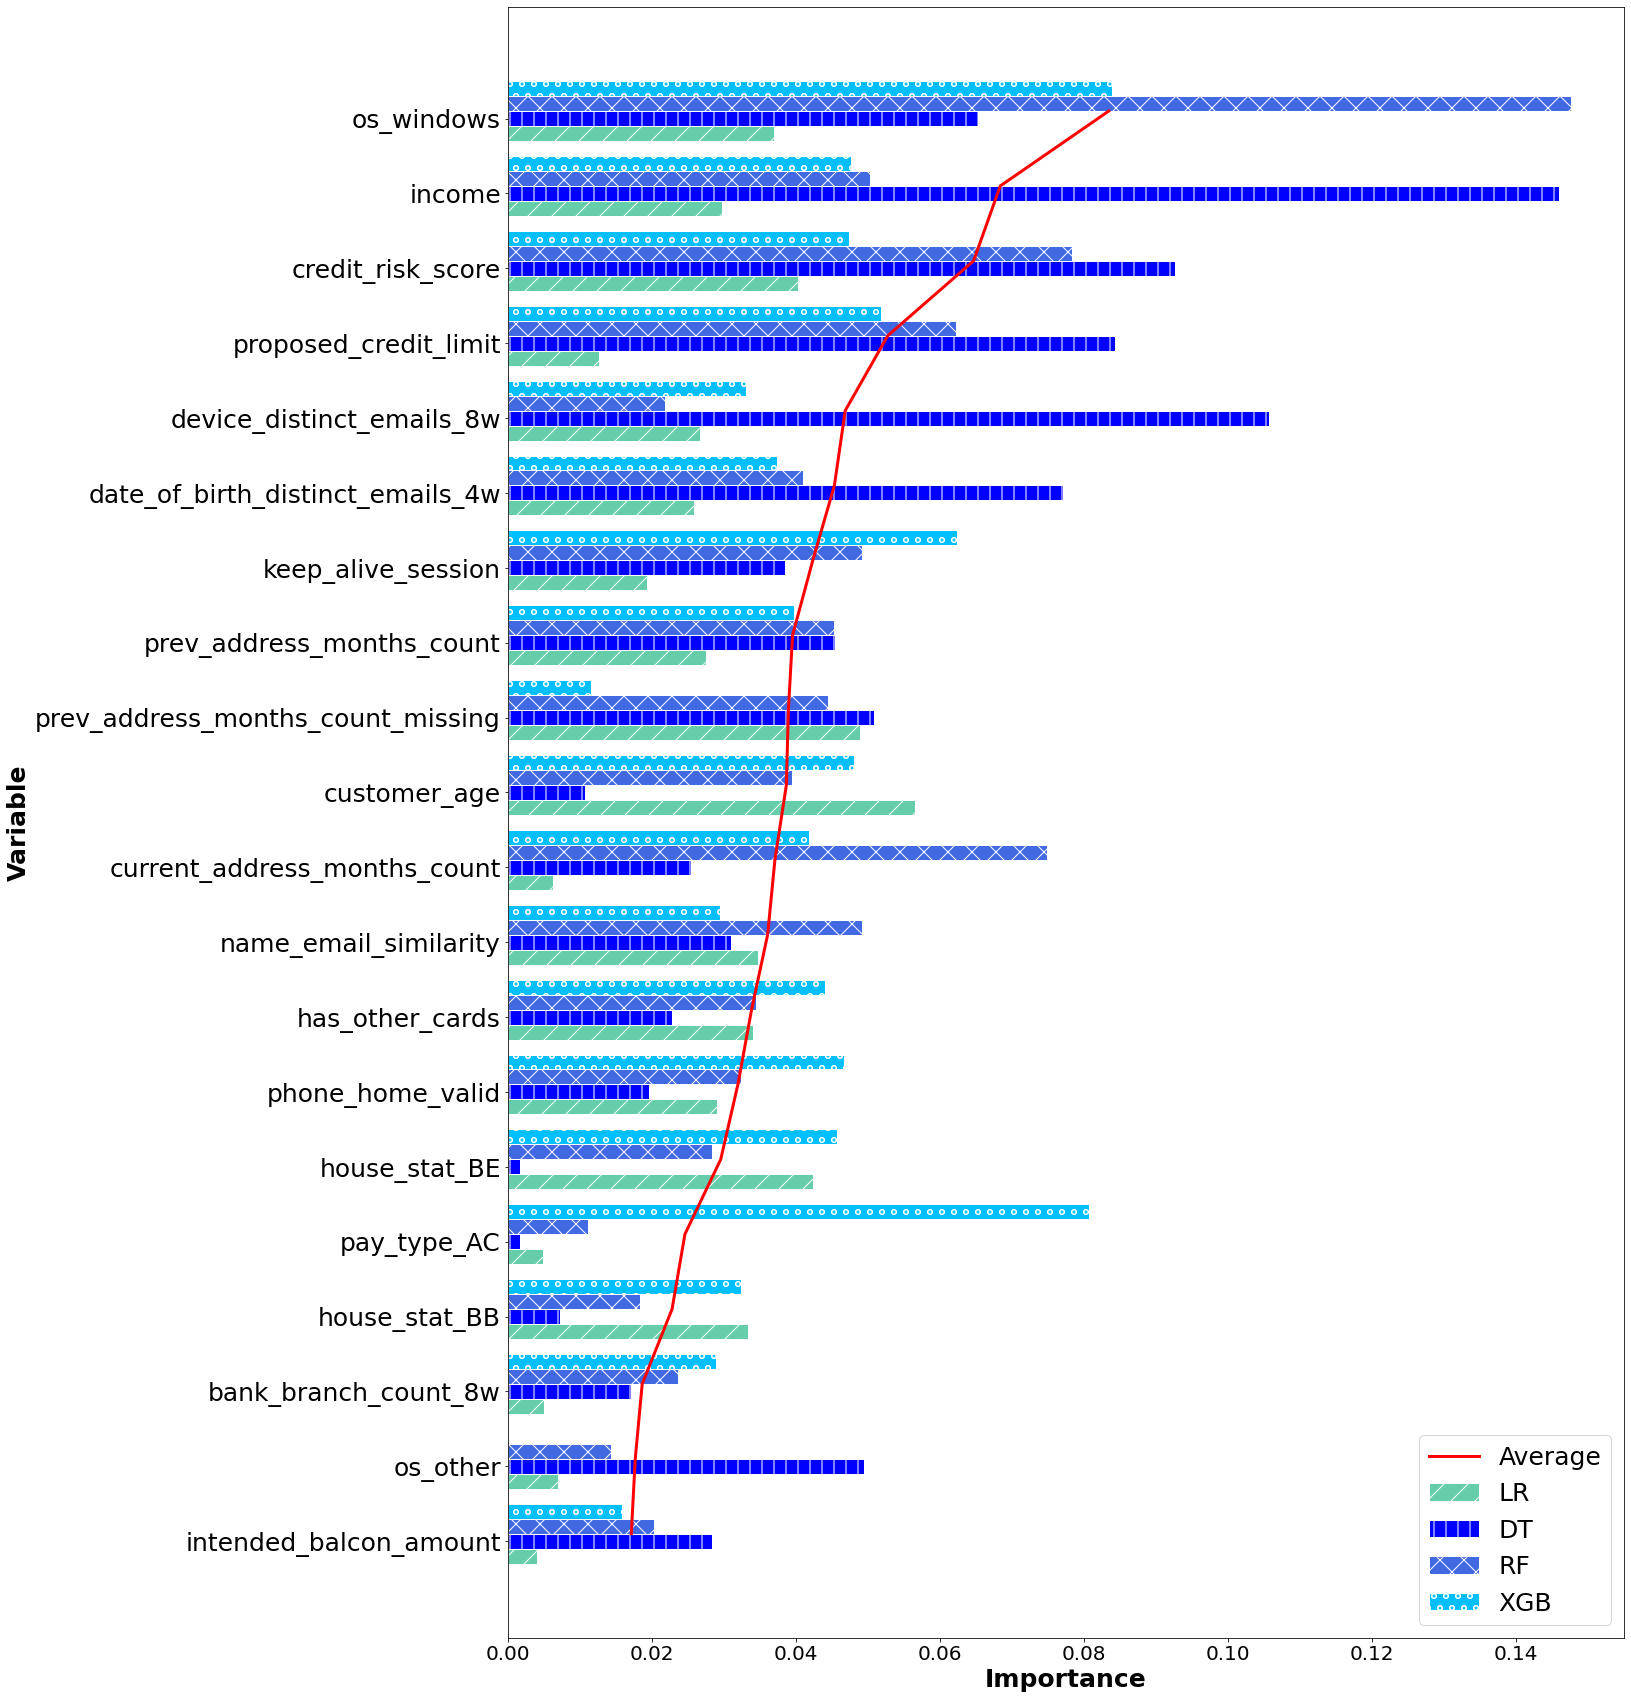

In [113]:
# set width of bar
barWidth = 0.2

# set height of bar
bars1 = df['LR']
bars2 = df['DT']
bars3 = df['RF']
bars4 = df['XGB']
bars5 = df['Average']

# set position of bar on x-axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth/2 for x in r2]

# make the plot
plt.figure(figsize=(20,30))
plt.barh(r1, bars1, color='mediumaquamarine', height=barWidth, edgecolor='white', label='LR',hatch = "/")
plt.barh(r2, bars2, color='blue', height=barWidth, edgecolor='white', label='DT',hatch = "|")
plt.barh(r3, bars3, color='royalblue', height=barWidth, edgecolor='white', label='RF', hatch = "x")
plt.barh(r4, bars4, color='deepskyblue', height=barWidth, edgecolor='white', label='XGB', hatch = "o")
plt.plot(bars5, r5, color='red', linewidth=3, label='Average')

# add xticks on the middle of the group bars
plt.ylabel('Variable', fontweight='bold', fontsize=25)
plt.xlabel('Importance', fontweight='bold', fontsize=25)
plt.yticks([r + barWidth for r in range(len(bars1))], df['Variable'], fontsize=25)
plt.xticks(fontsize=20)

# add legend on the right bottom
plt.legend(loc='lower right', fontsize=25)
plt.show()